In [1]:
import os
os.environ['MXNET_ENGINE_TYPE'] = 'NaiveEngine'
FIG_SIZE = (12, 8)
import numpy as np
N = 50
X = np.linspace(-5, 5, N)[:, None]
Y = (X > 0).astype(float)

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=FIG_SIZE)
plt.title('Step Function')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.plot(X, Y);

In [3]:
import mxfusion
import numpy as np
from mxfusion.common import config
config.DEFAULT_DTYPE = 'float64'

/Users/marpulli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
import mxnet as mx
import mxfusion.components.distributions.gp.kernels
from mxfusion.components.variables import PositiveTransformation
from mxfusion.modules.gp_modules.dgp import DeepGPRegression

M = 10
D = 1
z_locations = np.linspace(-5, 5, 10)[:, None]
m = mxfusion.Model()
m.N = mxfusion.Variable()
m.X = mxfusion.Variable(shape=(m.N, D))
m.Z_0 = mxfusion.Variable(shape=(M, D), initial_value=mx.nd.array(z_locations))
#m.Z_1 = mxfusion.Variable(shape=(M, D), initial_value=mx.nd.array(z_locations))

# this is the likelihood noise at the final layer
m.noise_var = mxfusion.Variable(transformation=PositiveTransformation())

kernels = [mxfusion.distributions.gp.kernels.RBF(D)]
m.Y = DeepGPRegression.define_variable(m.X, kernels, m.noise_var, shape=(m.N, 1), 
                                       inducing_inputs=[m.Z_0],#, m.Z_1], 
                                       n_samples=5)



In [5]:
import mxnet as mx
from mxfusion.inference import GradBasedInference, MAP

infr = GradBasedInference(inference_algorithm=MAP(model=m, observed=[m.X, m.Y]))
infr.run(X=mx.nd.array(X, dtype='float64'), Y=mx.nd.array(Y, dtype='float64'), max_iter=1, 
         learning_rate=0.05, verbose=True)

infr.params[m.Y.factor._module_graph.noise_var] = mx.nd.array([1e-6])

infr.run(X=mx.nd.array(X, dtype='float64'), Y=mx.nd.array(Y, dtype='float64'), max_iter=2000, 
         learning_rate=0.05, verbose=True)

/Users/marpulli/git/MXFusion/mxfusion/inference/inference_parameters.py:74: UserWarning: InferenceParameters has already been initialized.  The existing one will be overwritten.
  warnings.warn("InferenceParameters has already been initialized.  The existing one will be overwritten.")
/Users/marpulli/git/MXFusion/mxfusion/inference/inference.py:155: UserWarning: Trying to initialize the inference twice, skipping.
  warnings.warn("Trying to initialize the inference twice, skipping.")


cov (1, 50, 50)
(1, 1, 50, 10)

lik -2845.0752942685895
Iteration 1 loss: 2848.8662961520813cov (1, 50, 50)
(1, 1, 50, 10)

lik -2775.002588467552
cov (1, 50, 50)
(1, 1, 50, 10)

lik -654083835.689575
Iteration 1 loss: 654083838.7066866cov (1, 50, 50)
(1, 1, 50, 10)

lik -549400269.1601818
Iteration 2 loss: 549400273.4177732cov (1, 50, 50)
(1, 1, 50, 10)

lik -489310964.06547755
Iteration 3 loss: 489310970.0426295cov (1, 50, 50)
(1, 1, 50, 10)

lik -430533239.02422374
Iteration 4 loss: 430533247.6379691cov (1, 50, 50)
(1, 1, 50, 10)

lik -377590109.7827091
Iteration 5 loss: 377590122.2238139cov (1, 50, 50)
(1, 1, 50, 10)

lik -337035514.4769787
Iteration 6 loss: 337035530.9178828cov (1, 50, 50)
(1, 1, 50, 10)

lik -307554290.30107534
Iteration 7 loss: 307554309.6804204cov (1, 50, 50)
(1, 1, 50, 10)

lik -284812028.81726325
Iteration 8 loss: 284812050.61243504cov (1, 50, 50)
(1, 1, 50, 10)

lik -265476276.76122674
Iteration 9 loss: 265476300.99185073cov (1, 50, 50)
(1, 1, 50, 10)

lik -

Iteration 98 loss: 31431558.706118625cov (1, 50, 50)
(1, 1, 50, 10)

lik -31070288.640320238
Iteration 99 loss: 31070503.212851703cov (1, 50, 50)
(1, 1, 50, 10)

lik -30716219.428270582
Iteration 100 loss: 30716434.747774195cov (1, 50, 50)
(1, 1, 50, 10)

lik -30368940.15550649
Iteration 101 loss: 30369156.189698305cov (1, 50, 50)
(1, 1, 50, 10)

lik -30028259.119188003
Iteration 102 loss: 30028475.841904715cov (1, 50, 50)
(1, 1, 50, 10)

lik -29693990.877826046
Iteration 103 loss: 29694208.270078175cov (1, 50, 50)
(1, 1, 50, 10)

lik -29365956.832896255
Iteration 104 loss: 29366174.883747492cov (1, 50, 50)
(1, 1, 50, 10)

lik -29043985.507481597
Iteration 105 loss: 29044204.21464801cov (1, 50, 50)
(1, 1, 50, 10)

lik -28727912.588334356
Iteration 106 loss: 28728131.958410192cov (1, 50, 50)
(1, 1, 50, 10)

lik -28417580.626937725
Iteration 107 loss: 28417800.675183926cov (1, 50, 50)
(1, 1, 50, 10)

lik -28112838.63181764
Iteration 108 loss: 28113059.381489817cov (1, 50, 50)
(1, 1, 50, 

Iteration 195 loss: 13568768.581636911cov (1, 50, 50)
(1, 1, 50, 10)

lik -13478261.512008537
Iteration 196 loss: 13478613.745913966cov (1, 50, 50)
(1, 1, 50, 10)

lik -13389081.284220649
Iteration 197 loss: 13389435.232485842cov (1, 50, 50)
(1, 1, 50, 10)

lik -13300862.642795648
Iteration 198 loss: 13301218.301712232cov (1, 50, 50)
(1, 1, 50, 10)

lik -13213591.138904752
Iteration 199 loss: 13213948.504355574cov (1, 50, 50)
(1, 1, 50, 10)

lik -13127252.606994158
Iteration 200 loss: 13127611.674477583cov (1, 50, 50)
(1, 1, 50, 10)

lik -13041833.143003589
Iteration 201 loss: 13042193.907664865
cov (1, 50, 50)
(1, 1, 50, 10)

lik -12957319.120617999
Iteration 202 loss: 12957681.577285385cov (1, 50, 50)
(1, 1, 50, 10)

lik -12873697.162566902
Iteration 203 loss: 12874061.305791605cov (1, 50, 50)
(1, 1, 50, 10)

lik -12790954.142324185
Iteration 204 loss: 12791319.966421602cov (1, 50, 50)
(1, 1, 50, 10)

lik -12709077.199596638
Iteration 205 loss: 12709444.698686613cov (1, 50, 50)
(1, 1

Iteration 288 loss: 8033934.976449657cov (1, 50, 50)
(1, 1, 50, 10)

lik -7995017.779166265
Iteration 289 loss: 7995494.35174386cov (1, 50, 50)
(1, 1, 50, 10)

lik -7956873.668196982
Iteration 290 loss: 7957351.0796730835cov (1, 50, 50)
(1, 1, 50, 10)

lik -7919023.724083085
Iteration 291 loss: 7919501.963320305cov (1, 50, 50)
(1, 1, 50, 10)

lik -7881464.789015799
Iteration 292 loss: 7881943.844914971cov (1, 50, 50)
(1, 1, 50, 10)

lik -7844193.75204456
Iteration 293 loss: 7844673.6135463305cov (1, 50, 50)
(1, 1, 50, 10)

lik -7807207.545474863
Iteration 294 loss: 7807688.201561278cov (1, 50, 50)
(1, 1, 50, 10)

lik -7770503.138719567
Iteration 295 loss: 7770984.578415705cov (1, 50, 50)
(1, 1, 50, 10)

lik -7734077.545826418
Iteration 296 loss: 7734559.758201776cov (1, 50, 50)
(1, 1, 50, 10)

lik -7697927.821997119
Iteration 297 loss: 7698410.796166987cov (1, 50, 50)
(1, 1, 50, 10)

lik -7662051.060255999
Iteration 298 loss: 7662534.785382815cov (1, 50, 50)
(1, 1, 50, 10)

lik -762644


lik -5434766.407221252
Iteration 380 loss: 5435280.685013672cov (1, 50, 50)
(1, 1, 50, 10)

lik -5414298.044500042
Iteration 381 loss: 5414812.394055395cov (1, 50, 50)
(1, 1, 50, 10)

lik -5393953.333910579
Iteration 382 loss: 5394467.749791558cov (1, 50, 50)
(1, 1, 50, 10)

lik -5373731.237488541
Iteration 383 loss: 5374245.714315674cov (1, 50, 50)
(1, 1, 50, 10)

lik -5353630.727270631
Iteration 384 loss: 5354145.259721851cov (1, 50, 50)
(1, 1, 50, 10)

lik -5333650.787815436
Iteration 385 loss: 5334165.370625623cov (1, 50, 50)
(1, 1, 50, 10)

lik -5313790.414704322
Iteration 386 loss: 5314305.0426648585cov (1, 50, 50)
(1, 1, 50, 10)

lik -5294048.613096542
Iteration 387 loss: 5294563.281054867cov (1, 50, 50)
(1, 1, 50, 10)

lik -5274424.398913054
Iteration 388 loss: 5274939.10177221cov (1, 50, 50)
(1, 1, 50, 10)

lik -5254916.798692927
Iteration 389 loss: 5255431.531411105cov (1, 50, 50)
(1, 1, 50, 10)

lik -5235524.849451925
Iteration 390 loss: 5236039.607042014cov (1, 50, 50)
(1,

Iteration 480 loss: 3867575.705172421cov (1, 50, 50)
(1, 1, 50, 10)

lik -3855195.5420024483
Iteration 481 loss: 3855697.4636825235cov (1, 50, 50)
(1, 1, 50, 10)

lik -3843375.571306324
Iteration 482 loss: 3843877.236419564cov (1, 50, 50)
(1, 1, 50, 10)

lik -3831613.2235861234
Iteration 483 loss: 3832114.6304726093cov (1, 50, 50)
(1, 1, 50, 10)

lik -3819908.107960849
Iteration 484 loss: 3820409.254981538cov (1, 50, 50)
(1, 1, 50, 10)

lik -3808259.8383967066
Iteration 485 loss: 3808760.723933239cov (1, 50, 50)
(1, 1, 50, 10)

lik -3796668.0315473885
Iteration 486 loss: 3797168.654001851cov (1, 50, 50)
(1, 1, 50, 10)

lik -3785132.3074267507
Iteration 487 loss: 3785632.665221457cov (1, 50, 50)
(1, 1, 50, 10)

lik -3773652.2893724805
Iteration 488 loss: 3774152.3809497533cov (1, 50, 50)
(1, 1, 50, 10)

lik -3762227.6033264706
Iteration 489 loss: 3762727.427148413cov (1, 50, 50)
(1, 1, 50, 10)

lik -3750857.8798566516
Iteration 490 loss: 3751357.4344049655cov (1, 50, 50)
(1, 1, 50, 10)



lik -2929227.957015315
Iteration 578 loss: 2929699.702891263cov (1, 50, 50)
(1, 1, 50, 10)

lik -2921579.6519146846
Iteration 579 loss: 2922051.051549192cov (1, 50, 50)
(1, 1, 50, 10)

lik -2913962.8256586143
Iteration 580 loss: 2914433.878664075cov (1, 50, 50)
(1, 1, 50, 10)

lik -2906377.2991601652
Iteration 581 loss: 2906848.005156598cov (1, 50, 50)
(1, 1, 50, 10)

lik -2898822.892962134
Iteration 582 loss: 2899293.2515770304cov (1, 50, 50)
(1, 1, 50, 10)

lik -2891299.430632189
Iteration 583 loss: 2891769.4415005185cov (1, 50, 50)
(1, 1, 50, 10)

lik -2883806.736198231
Iteration 584 loss: 2884276.3989623287cov (1, 50, 50)
(1, 1, 50, 10)

lik -2876344.635824023
Iteration 585 loss: 2876813.950133555cov (1, 50, 50)
(1, 1, 50, 10)

lik -2868912.9552869448
Iteration 586 loss: 2869381.9207987613cov (1, 50, 50)
(1, 1, 50, 10)

lik -2861511.523309728
Iteration 587 loss: 2861980.139687869cov (1, 50, 50)
(1, 1, 50, 10)

lik -2854140.1682211626
Iteration 588 loss: 2854608.43513671cov (1, 50,


lik -2354177.5873494586
Iteration 667 loss: 2354617.706766485cov (1, 50, 50)
(1, 1, 50, 10)

lik -2348752.1874617017
Iteration 668 loss: 2349191.9489343236cov (1, 50, 50)
(1, 1, 50, 10)

lik -2343346.337063695
Iteration 669 loss: 2343785.740656366cov (1, 50, 50)
(1, 1, 50, 10)

lik -2337959.938259847
Iteration 670 loss: 2338398.984040155cov (1, 50, 50)
(1, 1, 50, 10)

lik -2332592.8943638904
Iteration 671 loss: 2333031.5824025646cov (1, 50, 50)
(1, 1, 50, 10)

lik -2327245.1093138466
Iteration 672 loss: 2327683.4396847268cov (1, 50, 50)
(1, 1, 50, 10)

lik -2321916.4871001714
Iteration 673 loss: 2322354.459880141cov (1, 50, 50)
(1, 1, 50, 10)

lik -2316606.9323359644
Iteration 674 loss: 2317044.5476049194cov (1, 50, 50)
(1, 1, 50, 10)

lik -2311316.3508142345
Iteration 675 loss: 2311753.608655092cov (1, 50, 50)
(1, 1, 50, 10)

lik -2306044.6483726418
Iteration 676 loss: 2306481.548871273cov (1, 50, 50)
(1, 1, 50, 10)

lik -2300791.732014387
Iteration 677 loss: 2301228.275259626cov (1,

Iteration 756 loss: 1938542.6716687046cov (1, 50, 50)
(1, 1, 50, 10)

lik -1934126.7741181096
Iteration 757 loss: 1934535.2379149953cov (1, 50, 50)
(1, 1, 50, 10)

lik -1930132.529864274
Iteration 758 loss: 1930540.6510790219cov (1, 50, 50)
(1, 1, 50, 10)

lik -1926151.0751912585
Iteration 759 loss: 1926558.8540737152cov (1, 50, 50)
(1, 1, 50, 10)

lik -1922182.3537457355
Iteration 760 loss: 1922589.7905469728cov (1, 50, 50)
(1, 1, 50, 10)

lik -1918226.3086897123
Iteration 761 loss: 1918633.403661944cov (1, 50, 50)
(1, 1, 50, 10)

lik -1914282.884319841
Iteration 762 loss: 1914689.6377164782cov (1, 50, 50)
(1, 1, 50, 10)

lik -1910352.0248499627
Iteration 763 loss: 1910758.4369255663cov (1, 50, 50)
(1, 1, 50, 10)

lik -1906433.6748146194
Iteration 764 loss: 1906839.7458248858cov (1, 50, 50)
(1, 1, 50, 10)

lik -1902527.7790667948
Iteration 765 loss: 1902933.509268543cov (1, 50, 50)
(1, 1, 50, 10)

lik -1898634.2831719313
Iteration 766 loss: 1899039.6728231236cov (1, 50, 50)
(1, 1, 50,

(1, 1, 50, 10)

lik -1619943.4034823768
Iteration 847 loss: 1620322.1445148096cov (1, 50, 50)
(1, 1, 50, 10)

lik -1616906.0461466475
Iteration 848 loss: 1617284.4704721107cov (1, 50, 50)
(1, 1, 50, 10)

lik -1613877.4442551057
Iteration 849 loss: 1614255.552186004cov (1, 50, 50)
(1, 1, 50, 10)

lik -1610857.5628596924
Iteration 850 loss: 1611235.35470872cov (1, 50, 50)
(1, 1, 50, 10)

lik -1607846.3671938255
Iteration 851 loss: 1608223.8432739598cov (1, 50, 50)
(1, 1, 50, 10)

lik -1604843.822671246
Iteration 852 loss: 1605220.9832957408cov (1, 50, 50)
(1, 1, 50, 10)

lik -1601849.8951791315
Iteration 853 loss: 1602226.7406615426cov (1, 50, 50)
(1, 1, 50, 10)

lik -1598864.5504859432
Iteration 854 loss: 1599241.081140091cov (1, 50, 50)
(1, 1, 50, 10)

lik -1595887.7542446814
Iteration 855 loss: 1596263.9703846134cov (1, 50, 50)
(1, 1, 50, 10)

lik -1592919.4728703578
Iteration 856 loss: 1593295.3748104053cov (1, 50, 50)
(1, 1, 50, 10)

lik -1589959.6729492515
Iteration 857 loss: 15903

Iteration 947 loss: 1354877.951096065cov (1, 50, 50)
(1, 1, 50, 10)

lik -1352219.7889897416
Iteration 948 loss: 1352568.146686943cov (1, 50, 50)
(1, 1, 50, 10)

lik -1349916.265819744
Iteration 949 loss: 1350264.3389614671cov (1, 50, 50)
(1, 1, 50, 10)

lik -1347618.717231431
Iteration 950 loss: 1347966.5061346372cov (1, 50, 50)
(1, 1, 50, 10)

lik -1345327.121978854
Iteration 951 loss: 1345674.6269603784cov (1, 50, 50)
(1, 1, 50, 10)

lik -1343041.45891418
Iteration 952 loss: 1343388.6802907302cov (1, 50, 50)
(1, 1, 50, 10)

lik -1340761.7067705477
Iteration 953 loss: 1341108.6448586734cov (1, 50, 50)
(1, 1, 50, 10)

lik -1338487.8443803333
Iteration 954 loss: 1338834.499496425cov (1, 50, 50)
(1, 1, 50, 10)

lik -1336219.850674587
Iteration 955 loss: 1336566.223134873cov (1, 50, 50)
(1, 1, 50, 10)

lik -1333957.7048971471
Iteration 956 loss: 1334303.795017718cov (1, 50, 50)
(1, 1, 50, 10)

lik -1331701.3861731098
Iteration 957 loss: 1332047.1942698902cov (1, 50, 50)
(1, 1, 50, 10)

l

Iteration 1036 loss: 1170567.5680744236cov (1, 50, 50)
(1, 1, 50, 10)

lik -1168393.049839841
Iteration 1037 loss: 1168717.3018383728cov (1, 50, 50)
(1, 1, 50, 10)

lik -1166547.4561792503
Iteration 1038 loss: 1166871.4510366856cov (1, 50, 50)
(1, 1, 50, 10)

lik -1164706.2631748898
Iteration 1039 loss: 1165030.0011878845cov (1, 50, 50)
(1, 1, 50, 10)

lik -1162869.456407311
Iteration 1040 loss: 1163192.937872235cov (1, 50, 50)
(1, 1, 50, 10)

lik -1161037.0215184814
Iteration 1041 loss: 1161360.2467314184cov (1, 50, 50)
(1, 1, 50, 10)

lik -1159208.944042272
Iteration 1042 loss: 1159531.9132989943cov (1, 50, 50)
(1, 1, 50, 10)

lik -1157385.2097436802
Iteration 1043 loss: 1157707.9233396726cov (1, 50, 50)
(1, 1, 50, 10)

lik -1155565.8044481615
Iteration 1044 loss: 1155888.2626786197cov (1, 50, 50)
(1, 1, 50, 10)

lik -1153750.7140412955
Iteration 1045 loss: 1154072.9172011258cov (1, 50, 50)
(1, 1, 50, 10)

lik -1151939.924301069
Iteration 1046 loss: 1152261.8726848639cov (1, 50, 50)


Iteration 1126 loss: 1020165.2115162249cov (1, 50, 50)
(1, 1, 50, 10)

lik -1018358.3758990584
Iteration 1127 loss: 1018660.6372277773cov (1, 50, 50)
(1, 1, 50, 10)

lik -1016857.3542196112
Iteration 1128 loss: 1017159.3838591723cov (1, 50, 50)
(1, 1, 50, 10)

lik -1015359.6429336485
Iteration 1129 loss: 1015661.4411520134cov (1, 50, 50)
(1, 1, 50, 10)

lik -1013865.2320949935
Iteration 1130 loss: 1014166.7991598035cov (1, 50, 50)
(1, 1, 50, 10)

lik -1012374.1116613388
Iteration 1131 loss: 1012675.4478398951cov (1, 50, 50)
(1, 1, 50, 10)

lik -1010886.271764741
Iteration 1132 loss: 1011187.3773240247cov (1, 50, 50)
(1, 1, 50, 10)

lik -1009401.7023071478
Iteration 1133 loss: 1009702.5775137786cov (1, 50, 50)
(1, 1, 50, 10)

lik -1007920.3934989457
Iteration 1134 loss: 1008221.0386192236cov (1, 50, 50)
(1, 1, 50, 10)

lik -1006442.3354549494
Iteration 1135 loss: 1006742.7507548337cov (1, 50, 50)
(1, 1, 50, 10)

lik -1004967.5184622633
Iteration 1136 loss: 1005267.7042073932cov (1, 50, 


lik -895436.874721449
Iteration 1217 loss: 895719.3178031319cov (1, 50, 50)
(1, 1, 50, 10)

lik -894197.7151286595
Iteration 1218 loss: 894479.9492947386cov (1, 50, 50)
(1, 1, 50, 10)

lik -892961.098849903
Iteration 1219 loss: 893243.124338256cov (1, 50, 50)
(1, 1, 50, 10)

lik -891727.0186209987
Iteration 1220 loss: 892008.8356691585cov (1, 50, 50)
(1, 1, 50, 10)

lik -890495.4673140468
Iteration 1221 loss: 890777.0761592203cov (1, 50, 50)
(1, 1, 50, 10)

lik -889266.4378271991
Iteration 1222 loss: 889547.8387062675cov (1, 50, 50)
(1, 1, 50, 10)

lik -888039.9230845417
Iteration 1223 loss: 888321.1162340608cov (1, 50, 50)
(1, 1, 50, 10)

lik -886815.9160359744
Iteration 1224 loss: 887096.9016921751cov (1, 50, 50)
(1, 1, 50, 10)

lik -885594.4095488633
Iteration 1225 loss: 885875.187947633cov (1, 50, 50)
(1, 1, 50, 10)

lik -884375.3966250317
Iteration 1226 loss: 884655.9680019334cov (1, 50, 50)
(1, 1, 50, 10)

lik -883158.8703995179
Iteration 1227 loss: 883439.234989809cov (1, 50, 5

Iteration 1307 loss: 793581.896796318cov (1, 50, 50)
(1, 1, 50, 10)

lik -792281.1302619284
Iteration 1308 loss: 792545.4968280699cov (1, 50, 50)
(1, 1, 50, 10)

lik -791246.9086749523
Iteration 1309 loss: 791511.086657085cov (1, 50, 50)
(1, 1, 50, 10)

lik -790214.6713016522
Iteration 1310 loss: 790478.6609088467cov (1, 50, 50)
(1, 1, 50, 10)

lik -789184.413056107
Iteration 1311 loss: 789448.2144971568cov (1, 50, 50)
(1, 1, 50, 10)

lik -788156.1286005192
Iteration 1312 loss: 788419.7420838921cov (1, 50, 50)
(1, 1, 50, 10)

lik -787129.812884075
Iteration 1313 loss: 787393.2386179626cov (1, 50, 50)
(1, 1, 50, 10)

lik -786105.4606942608
Iteration 1314 loss: 786368.698886546cov (1, 50, 50)
(1, 1, 50, 10)

lik -785083.0668365499
Iteration 1315 loss: 785346.1176948075cov (1, 50, 50)
(1, 1, 50, 10)

lik -784062.6262231553
Iteration 1316 loss: 784325.4899546686cov (1, 50, 50)
(1, 1, 50, 10)

lik -783044.1336948114
Iteration 1317 loss: 783306.8105065564cov (1, 50, 50)
(1, 1, 50, 10)

lik -

lik -707453.1479213597
Iteration 1397 loss: 707701.5159482826cov (1, 50, 50)
(1, 1, 50, 10)

lik -706576.9181049734
Iteration 1398 loss: 706825.1150179417cov (1, 50, 50)
(1, 1, 50, 10)

lik -705702.2693950599
Iteration 1399 loss: 705950.2953777988cov (1, 50, 50)
(1, 1, 50, 10)

lik -704829.1977955697
Iteration 1400 loss: 705077.0530315185cov (1, 50, 50)
(1, 1, 50, 10)

lik -703957.6994731629
Iteration 1401 loss: 704205.3841455048
cov (1, 50, 50)
(1, 1, 50, 10)

lik -703087.7705319707
Iteration 1402 loss: 703335.284823619cov (1, 50, 50)
(1, 1, 50, 10)

lik -702219.4071631493
Iteration 1403 loss: 702466.7512567618cov (1, 50, 50)
(1, 1, 50, 10)

lik -701352.6054212045
Iteration 1404 loss: 701599.7794991551cov (1, 50, 50)
(1, 1, 50, 10)

lik -700487.3615219756
Iteration 1405 loss: 700734.365766384cov (1, 50, 50)
(1, 1, 50, 10)

lik -699623.6716191659
Iteration 1406 loss: 699870.5062118833cov (1, 50, 50)
(1, 1, 50, 10)

lik -698761.5318788431
Iteration 1407 loss: 699008.1970014524cov (1, 50


lik -633747.2687819911
Iteration 1488 loss: 633980.7862593973cov (1, 50, 50)
(1, 1, 50, 10)

lik -633000.3079241455
Iteration 1489 loss: 633233.6699560287cov (1, 50, 50)
(1, 1, 50, 10)

lik -632254.6181260177
Iteration 1490 loss: 632487.8248733081cov (1, 50, 50)
(1, 1, 50, 10)

lik -631510.1963725429
Iteration 1491 loss: 631743.2479959248cov (1, 50, 50)
(1, 1, 50, 10)

lik -630767.0397208569
Iteration 1492 loss: 630999.9363807822cov (1, 50, 50)
(1, 1, 50, 10)

lik -630025.1452369823
Iteration 1493 loss: 630257.8870936709cov (1, 50, 50)
(1, 1, 50, 10)

lik -629284.5099957922
Iteration 1494 loss: 629517.0972092326cov (1, 50, 50)
(1, 1, 50, 10)

lik -628545.1310809808
Iteration 1495 loss: 628777.5638109302cov (1, 50, 50)
(1, 1, 50, 10)

lik -627807.0055850265
Iteration 1496 loss: 628039.2839910116cov (1, 50, 50)
(1, 1, 50, 10)

lik -627070.1306091622
Iteration 1497 loss: 627302.254850479cov (1, 50, 50)
(1, 1, 50, 10)

lik -626334.50326334
Iteration 1498 loss: 626566.4734990548cov (1, 50,

Iteration 1578 loss: 571505.4272628042cov (1, 50, 50)
(1, 1, 50, 10)

lik -570641.8371253021
Iteration 1579 loss: 570861.8406744868cov (1, 50, 50)
(1, 1, 50, 10)

lik -569999.4292412394
Iteration 1580 loss: 570219.2910777816cov (1, 50, 50)
(1, 1, 50, 10)

lik -569358.0559971796
Iteration 1581 loss: 569577.7762622557cov (1, 50, 50)
(1, 1, 50, 10)

lik -568717.71508196
Iteration 1582 loss: 568937.293916537cov (1, 50, 50)
(1, 1, 50, 10)

lik -568078.4042445641
Iteration 1583 loss: 568297.8417894109cov (1, 50, 50)
(1, 1, 50, 10)

lik -567440.1212403531
Iteration 1584 loss: 567659.417636041cov (1, 50, 50)
(1, 1, 50, 10)

lik -566802.86377782
Iteration 1585 loss: 567022.0191647116cov (1, 50, 50)
(1, 1, 50, 10)

lik -566166.6296783878
Iteration 1586 loss: 566385.6441966605cov (1, 50, 50)
(1, 1, 50, 10)

lik -565531.4166633753
Iteration 1587 loss: 565750.2904529984cov (1, 50, 50)
(1, 1, 50, 10)

lik -564897.222460726
Iteration 1588 loss: 565115.9556614611cov (1, 50, 50)
(1, 1, 50, 10)

lik -56

(1, 1, 50, 10)

lik -516717.3430413787
Iteration 1669 loss: 516925.1350433592cov (1, 50, 50)
(1, 1, 50, 10)

lik -516159.6516891646
Iteration 1670 loss: 516367.3139162461cov (1, 50, 50)
(1, 1, 50, 10)

lik -515602.81374022487
Iteration 1671 loss: 515810.34631675726cov (1, 50, 50)
(1, 1, 50, 10)

lik -515046.827392905
Iteration 1672 loss: 515254.23044305894cov (1, 50, 50)
(1, 1, 50, 10)

lik -514491.6908963814
Iteration 1673 loss: 514698.9645441595cov (1, 50, 50)
(1, 1, 50, 10)

lik -513937.4024587073
Iteration 1674 loss: 514144.5468279336cov (1, 50, 50)
(1, 1, 50, 10)

lik -513383.96033858415
Iteration 1675 loss: 513590.97555291536cov (1, 50, 50)
(1, 1, 50, 10)

lik -512831.36275371007
Iteration 1676 loss: 513038.2489366249cov (1, 50, 50)
(1, 1, 50, 10)

lik -512279.6079722482
Iteration 1677 loss: 512486.36524705857cov (1, 50, 50)
(1, 1, 50, 10)

lik -511728.69426696916
Iteration 1678 loss: 511935.3227568203cov (1, 50, 50)
(1, 1, 50, 10)

lik -511178.6198698163
Iteration 1679 loss: 511

Iteration 1759 loss: 469942.3446784955cov (1, 50, 50)
(1, 1, 50, 10)

lik -469258.27368562797
Iteration 1760 loss: 469454.74509790883cov (1, 50, 50)
(1, 1, 50, 10)

lik -468771.5041648939
Iteration 1761 loss: 468967.85644306807cov (1, 50, 50)
(1, 1, 50, 10)

lik -468285.44407787087
Iteration 1762 loss: 468481.67733167316cov (1, 50, 50)
(1, 1, 50, 10)

lik -467800.0920061725
Iteration 1763 loss: 467996.20634518535cov (1, 50, 50)
(1, 1, 50, 10)

lik -467315.44653510815
Iteration 1764 loss: 467511.4420687617cov (1, 50, 50)
(1, 1, 50, 10)

lik -466831.5062536736
Iteration 1765 loss: 467027.38309124624cov (1, 50, 50)
(1, 1, 50, 10)

lik -466348.2697940638
Iteration 1766 loss: 466544.02804469207cov (1, 50, 50)
(1, 1, 50, 10)

lik -465865.73579191
Iteration 1767 loss: 466061.3755645886cov (1, 50, 50)
(1, 1, 50, 10)

lik -465383.90284686524
Iteration 1768 loss: 465579.424250438cov (1, 50, 50)
(1, 1, 50, 10)

lik -464902.769562221
Iteration 1769 loss: 465098.1727053808cov (1, 50, 50)
(1, 1, 50,

Iteration 1850 loss: 428320.20774444257cov (1, 50, 50)
(1, 1, 50, 10)

lik -427705.88598428195
Iteration 1851 loss: 427891.94813618314cov (1, 50, 50)
(1, 1, 50, 10)

lik -427278.3323878209
Iteration 1852 loss: 427464.28481188463cov (1, 50, 50)
(1, 1, 50, 10)

lik -426851.37384587293
Iteration 1853 loss: 427037.21663928113cov (1, 50, 50)
(1, 1, 50, 10)

lik -426425.0092291032
Iteration 1854 loss: 426610.74248890794cov (1, 50, 50)
(1, 1, 50, 10)

lik -425999.23744549183
Iteration 1855 loss: 426184.86126862455cov (1, 50, 50)
(1, 1, 50, 10)

lik -425574.05737114133
Iteration 1856 loss: 425759.57185440406cov (1, 50, 50)
(1, 1, 50, 10)

lik -425149.4678849288
Iteration 1857 loss: 425334.8731249944cov (1, 50, 50)
(1, 1, 50, 10)

lik -424725.46786849905
Iteration 1858 loss: 424910.76396191155cov (1, 50, 50)
(1, 1, 50, 10)

lik -424302.056240574
Iteration 1859 loss: 424487.2432837576cov (1, 50, 50)
(1, 1, 50, 10)

lik -423879.23185390304
Iteration 1860 loss: 424064.3099431446cov (1, 50, 50)
(1,

Iteration 1942 loss: 391282.43697578524cov (1, 50, 50)
(1, 1, 50, 10)

lik -390728.29203125904
Iteration 1943 loss: 390904.65058265394cov (1, 50, 50)
(1, 1, 50, 10)

lik -390351.1102332284
Iteration 1944 loss: 390527.36748919194cov (1, 50, 50)
(1, 1, 50, 10)

lik -389974.4307399118
Iteration 1945 loss: 390150.58678672934cov (1, 50, 50)
(1, 1, 50, 10)

lik -389598.2526751454
Iteration 1946 loss: 389774.307599cov (1, 50, 50)
(1, 1, 50, 10)

lik -389222.5751043032
Iteration 1947 loss: 389398.5289912592cov (1, 50, 50)
(1, 1, 50, 10)

lik -388847.39715538634
Iteration 1948 loss: 389023.2500914063cov (1, 50, 50)
(1, 1, 50, 10)

lik -388472.7179282242
Iteration 1949 loss: 388648.46999916044cov (1, 50, 50)
(1, 1, 50, 10)

lik -388098.5365247566
Iteration 1950 loss: 388274.18781635165cov (1, 50, 50)
(1, 1, 50, 10)

lik -387724.8520490266
Iteration 1951 loss: 387900.4026469135cov (1, 50, 50)
(1, 1, 50, 10)

lik -387351.66360717657
Iteration 1952 loss: 387527.1135968787cov (1, 50, 50)
(1, 1, 50, 

In [6]:
infr.run(X=mx.nd.array(X, dtype='float64'), Y=mx.nd.array(Y, dtype='float64'), max_iter=2000, 
         learning_rate=0.05, verbose=True)

cov (1, 50, 50)


/Users/marpulli/git/MXFusion/mxfusion/inference/inference.py:155: UserWarning: Trying to initialize the inference twice, skipping.
  warnings.warn("Trying to initialize the inference twice, skipping.")


(1, 1, 50, 10)

lik -369655.073290098
Iteration 1 loss: 369825.6960346899cov (1, 50, 50)
(1, 1, 50, 10)

lik -364402.80189922155
Iteration 2 loss: 364620.9894673057cov (1, 50, 50)
(1, 1, 50, 10)

lik -348107.8734983574
Iteration 3 loss: 348255.71318622143cov (1, 50, 50)
(1, 1, 50, 10)

lik -321904.74103248754
Iteration 4 loss: 322007.4557832858cov (1, 50, 50)
(1, 1, 50, 10)

lik -306502.2296610962
Iteration 5 loss: 306578.90312986803cov (1, 50, 50)
(1, 1, 50, 10)

lik -294602.4961009091
Iteration 6 loss: 294662.1063877055cov (1, 50, 50)
(1, 1, 50, 10)

lik -277930.5792012495
Iteration 7 loss: 277979.184521292cov (1, 50, 50)
(1, 1, 50, 10)

lik -261417.6543442762
Iteration 8 loss: 261459.04739732278cov (1, 50, 50)
(1, 1, 50, 10)

lik -248696.74949404979
Iteration 9 loss: 248733.12381481018cov (1, 50, 50)
(1, 1, 50, 10)

lik -237841.70768229087
Iteration 10 loss: 237874.38635350854cov (1, 50, 50)
(1, 1, 50, 10)

lik -226375.2199999682
Iteration 11 loss: 226405.23375534956cov (1, 50, 50)


(1, 1, 50, 10)

lik -27184.214218509645
Iteration 91 loss: 27193.914791901712cov (1, 50, 50)
(1, 1, 50, 10)

lik -26814.98845481785
Iteration 92 loss: 26824.633343533664cov (1, 50, 50)
(1, 1, 50, 10)

lik -26454.130209242143
Iteration 93 loss: 26463.721057915667cov (1, 50, 50)
(1, 1, 50, 10)

lik -26101.368940447574
Iteration 94 loss: 26110.90737300039cov (1, 50, 50)
(1, 1, 50, 10)

lik -25756.44811843825
Iteration 95 loss: 25765.935738866334cov (1, 50, 50)
(1, 1, 50, 10)

lik -25419.121505936426
Iteration 96 loss: 25428.559902235163cov (1, 50, 50)
(1, 1, 50, 10)

lik -25089.15050212769
Iteration 97 loss: 25098.54124983288cov (1, 50, 50)
(1, 1, 50, 10)

lik -24766.302806994354
Iteration 98 loss: 24775.64746825042cov (1, 50, 50)
(1, 1, 50, 10)

lik -24450.352703541193
Iteration 99 loss: 24459.652819091436cov (1, 50, 50)
(1, 1, 50, 10)

lik -24141.082331937025
Iteration 100 loss: 24150.33940603056cov (1, 50, 50)
(1, 1, 50, 10)

lik -23838.283192563744
Iteration 101 loss: 23847.4986734183

Iteration 180 loss: 11093.997655022966cov (1, 50, 50)
(1, 1, 50, 10)

lik -11002.376343947968
Iteration 181 loss: 11010.075269539471cov (1, 50, 50)
(1, 1, 50, 10)

lik -10919.523439149769
Iteration 182 loss: 10927.212778545512cov (1, 50, 50)
(1, 1, 50, 10)

lik -10837.712344295747
Iteration 183 loss: 10845.39217627796cov (1, 50, 50)
(1, 1, 50, 10)

lik -10756.925444799452
Iteration 184 loss: 10764.595845936223cov (1, 50, 50)
(1, 1, 50, 10)

lik -10677.145504574935
Iteration 185 loss: 10684.806549354907cov (1, 50, 50)
(1, 1, 50, 10)

lik -10598.355663160288
Iteration 186 loss: 10606.007424112337cov (1, 50, 50)
(1, 1, 50, 10)

lik -10520.539425558094
Iteration 187 loss: 10528.181973353574cov (1, 50, 50)
(1, 1, 50, 10)

lik -10443.680631675832
Iteration 188 loss: 10451.314035210406cov (1, 50, 50)
(1, 1, 50, 10)

lik -10367.76347538773
Iteration 189 loss: 10375.38780184908cov (1, 50, 50)
(1, 1, 50, 10)

lik -10292.772474696758
Iteration 190 loss: 10300.387789613664cov (1, 50, 50)
(1, 1, 50

Iteration 272 loss: 6290.579219029786cov (1, 50, 50)
(1, 1, 50, 10)

lik -6252.326936701792
Iteration 273 loss: 6259.321409751331cov (1, 50, 50)
(1, 1, 50, 10)

lik -6221.361290791464
Iteration 274 loss: 6228.349212503681cov (1, 50, 50)
(1, 1, 50, 10)

lik -6190.677839529491
Iteration 275 loss: 6197.659225818141cov (1, 50, 50)
(1, 1, 50, 10)

lik -6160.273228561741
Iteration 276 loss: 6167.248095260341cov (1, 50, 50)
(1, 1, 50, 10)

lik -6130.144158938866
Iteration 277 loss: 6137.112521804672cov (1, 50, 50)
(1, 1, 50, 10)

lik -6100.287374676114
Iteration 278 loss: 6107.249249391532cov (1, 50, 50)
(1, 1, 50, 10)

lik -6070.6996733094675
Iteration 279 loss: 6077.655075485842cov (1, 50, 50)
(1, 1, 50, 10)

lik -6041.377898151692
Iteration 280 loss: 6048.3268433315225cov (1, 50, 50)
(1, 1, 50, 10)

lik -6012.3189375128195
Iteration 281 loss: 6019.261441171892cov (1, 50, 50)
(1, 1, 50, 10)

lik -5983.519726098345
Iteration 282 loss: 5990.455803648248cov (1, 50, 50)
(1, 1, 50, 10)

lik -595


lik -4269.764987698217
Iteration 365 loss: 4276.217493954863cov (1, 50, 50)
(1, 1, 50, 10)

lik -4255.185579525885
Iteration 366 loss: 4261.632823184634cov (1, 50, 50)
(1, 1, 50, 10)

lik -4240.713235156417
Iteration 367 loss: 4247.1552288206685cov (1, 50, 50)
(1, 1, 50, 10)

lik -4226.346960211912
Iteration 368 loss: 4232.783716455117cov (1, 50, 50)
(1, 1, 50, 10)

lik -4212.085771935545
Iteration 369 loss: 4218.517303301156cov (1, 50, 50)
(1, 1, 50, 10)

lik -4197.928698078173
Iteration 370 loss: 4204.355017079252cov (1, 50, 50)
(1, 1, 50, 10)

lik -4183.874778649554
Iteration 371 loss: 4190.295897769082cov (1, 50, 50)
(1, 1, 50, 10)

lik -4169.923063858707
Iteration 372 loss: 4176.338995549192cov (1, 50, 50)
(1, 1, 50, 10)

lik -4156.072615838441
Iteration 373 loss: 4162.483372522225cov (1, 50, 50)
(1, 1, 50, 10)

lik -4142.3225057069
Iteration 374 loss: 4148.728099775427cov (1, 50, 50)
(1, 1, 50, 10)

lik -4128.671816208995
Iteration 375 loss: 4135.07226002312cov (1, 50, 50)
(1, 1

Iteration 457 loss: 3283.502533754416cov (1, 50, 50)
(1, 1, 50, 10)

lik -3269.689329750982
Iteration 458 loss: 3275.702261299331cov (1, 50, 50)
(1, 1, 50, 10)

lik -3261.942322907903
Iteration 459 loss: 3267.951028970781cov (1, 50, 50)
(1, 1, 50, 10)

lik -3254.243967681845
Iteration 460 loss: 3260.248457919624cov (1, 50, 50)
(1, 1, 50, 10)

lik -3246.5938893568914
Iteration 461 loss: 3252.5941733994277cov (1, 50, 50)
(1, 1, 50, 10)

lik -3238.9917172619453
Iteration 462 loss: 3244.987804708933cov (1, 50, 50)
(1, 1, 50, 10)

lik -3231.437083328795
Iteration 463 loss: 3237.4289837493475cov (1, 50, 50)
(1, 1, 50, 10)

lik -3223.9296234564445
Iteration 464 loss: 3229.9173463894545cov (1, 50, 50)
(1, 1, 50, 10)

lik -3216.468976545255
Iteration 465 loss: 3222.4525314992375cov (1, 50, 50)
(1, 1, 50, 10)

lik -3209.054785375679
Iteration 466 loss: 3215.0341818291295cov (1, 50, 50)
(1, 1, 50, 10)

lik -3201.686696105328
Iteration 467 loss: 3207.6619435068237cov (1, 50, 50)
(1, 1, 50, 10)

li

Iteration 547 loss: 2741.085101176548cov (1, 50, 50)
(1, 1, 50, 10)

lik -2730.851576644791
Iteration 548 loss: 2736.5195606368275cov (1, 50, 50)
(1, 1, 50, 10)

lik -2726.3151497795134
Iteration 549 loss: 2731.9796670174396cov (1, 50, 50)
(1, 1, 50, 10)

lik -2721.8041903894746
Iteration 550 loss: 2727.4652481996372cov (1, 50, 50)
(1, 1, 50, 10)

lik -2717.3185288168957
Iteration 551 loss: 2722.976134505444cov (1, 50, 50)
(1, 1, 50, 10)

lik -2712.857996271448
Iteration 552 loss: 2718.5121571240657cov (1, 50, 50)
(1, 1, 50, 10)

lik -2708.422425337684
Iteration 553 loss: 2714.0731486197155cov (1, 50, 50)
(1, 1, 50, 10)

lik -2704.011649961481
Iteration 554 loss: 2709.6589429180594cov (1, 50, 50)
(1, 1, 50, 10)

lik -2699.62550543665
Iteration 555 loss: 2705.269375292825cov (1, 50, 50)
(1, 1, 50, 10)

lik -2695.263828391684
Iteration 556 loss: 2700.904282352545cov (1, 50, 50)
(1, 1, 50, 10)

lik -2690.926456776659
Iteration 557 loss: 2696.563502027464cov (1, 50, 50)
(1, 1, 50, 10)

lik


lik -2399.2575898800706
Iteration 641 loss: 2404.6321466743993cov (1, 50, 50)
(1, 1, 50, 10)

lik -2396.507934044208
Iteration 642 loss: 2401.8796305684004cov (1, 50, 50)
(1, 1, 50, 10)

lik -2393.7724352285586
Iteration 643 loss: 2399.1412772975573cov (1, 50, 50)
(1, 1, 50, 10)

lik -2391.0510093319135
Iteration 644 loss: 2396.417002747447cov (1, 50, 50)
(1, 1, 50, 10)

lik -2388.343572852124
Iteration 645 loss: 2393.7067234027454cov (1, 50, 50)
(1, 1, 50, 10)

lik -2385.6500428809704
Iteration 646 loss: 2391.0103563421003cov (1, 50, 50)
(1, 1, 50, 10)

lik -2382.970337388003
Iteration 647 loss: 2388.3278195222724cov (1, 50, 50)
(1, 1, 50, 10)

lik -2380.3043740588278
Iteration 648 loss: 2385.6590306152cov (1, 50, 50)
(1, 1, 50, 10)

lik -2377.6520720265394
Iteration 649 loss: 2383.003908741267cov (1, 50, 50)
(1, 1, 50, 10)

lik -2375.013350708307
Iteration 650 loss: 2380.362373304661cov (1, 50, 50)
(1, 1, 50, 10)

lik -2372.388130090311
Iteration 651 loss: 2377.734344278618cov (1, 5


lik -2199.9321194837635
Iteration 731 loss: 2205.071056147866cov (1, 50, 50)
(1, 1, 50, 10)

lik -2198.178645363479
Iteration 732 loss: 2203.315195130963cov (1, 50, 50)
(1, 1, 50, 10)

lik -2196.433656517809
Iteration 733 loss: 2201.5678241078513cov (1, 50, 50)
(1, 1, 50, 10)

lik -2194.697106834467
Iteration 734 loss: 2199.8288969548003cov (1, 50, 50)
(1, 1, 50, 10)

lik -2192.968950674762
Iteration 735 loss: 2198.098368021946cov (1, 50, 50)
(1, 1, 50, 10)

lik -2191.2491426897077
Iteration 736 loss: 2196.3761919491512cov (1, 50, 50)
(1, 1, 50, 10)

lik -2189.537637641429
Iteration 737 loss: 2194.6623234871686cov (1, 50, 50)
(1, 1, 50, 10)

lik -2187.8343907561525
Iteration 738 loss: 2192.956717851123cov (1, 50, 50)
(1, 1, 50, 10)

lik -2186.139357368725
Iteration 739 loss: 2191.259330364537cov (1, 50, 50)
(1, 1, 50, 10)

lik -2184.452493098295
Iteration 740 loss: 2189.570116635262cov (1, 50, 50)
(1, 1, 50, 10)

lik -2182.773754018868
Iteration 741 loss: 2187.8890327262743cov (1, 50,

Iteration 823 loss: 2074.009875363654cov (1, 50, 50)
(1, 1, 50, 10)

lik -2067.937997277696
Iteration 824 loss: 2072.8737402247493cov (1, 50, 50)
(1, 1, 50, 10)

lik -2066.809102119464
Iteration 825 loss: 2071.742851691692cov (1, 50, 50)
(1, 1, 50, 10)

lik -2065.6854234645575
Iteration 826 loss: 2070.6171834318266cov (1, 50, 50)
(1, 1, 50, 10)

lik -2064.5669350299822
Iteration 827 loss: 2069.496709153079cov (1, 50, 50)
(1, 1, 50, 10)

lik -2063.453610795838
Iteration 828 loss: 2068.3814028266943cov (1, 50, 50)
(1, 1, 50, 10)

lik -2062.3454247820127
Iteration 829 loss: 2067.271238463539cov (1, 50, 50)
(1, 1, 50, 10)

lik -2061.2423511589927
Iteration 830 loss: 2066.1661902251035cov (1, 50, 50)
(1, 1, 50, 10)

lik -2060.144364355615
Iteration 831 loss: 2065.0662325314556cov (1, 50, 50)
(1, 1, 50, 10)

lik -2059.0514389473237
Iteration 832 loss: 2063.971339949297cov (1, 50, 50)
(1, 1, 50, 10)

lik -2057.9635494397985
Iteration 833 loss: 2062.8814869752023cov (1, 50, 50)
(1, 1, 50, 10)


Iteration 915 loss: 1988.512375230543cov (1, 50, 50)
(1, 1, 50, 10)

lik -1982.9979281515796
Iteration 916 loss: 1987.7650028139014cov (1, 50, 50)
(1, 1, 50, 10)

lik -1982.2555816328086
Iteration 917 loss: 1987.0209752505373cov (1, 50, 50)
(1, 1, 50, 10)

lik -1981.516561082263
Iteration 918 loss: 1986.2802767005549cov (1, 50, 50)
(1, 1, 50, 10)

lik -1980.7808506803835
Iteration 919 loss: 1985.5428913374535cov (1, 50, 50)
(1, 1, 50, 10)

lik -1980.0484347627444
Iteration 920 loss: 1984.8088034900486cov (1, 50, 50)
(1, 1, 50, 10)

lik -1979.3192977480317
Iteration 921 loss: 1984.0779975702878cov (1, 50, 50)
(1, 1, 50, 10)

lik -1978.5934240679142
Iteration 922 loss: 1983.3504580029621cov (1, 50, 50)
(1, 1, 50, 10)

lik -1977.8707983066129
Iteration 923 loss: 1982.6261693655963cov (1, 50, 50)
(1, 1, 50, 10)

lik -1977.1514051299168
Iteration 924 loss: 1981.9051163173026cov (1, 50, 50)
(1, 1, 50, 10)

lik -1976.4352292160652
Iteration 925 loss: 1981.187283529506cov (1, 50, 50)
(1, 1, 50


lik -1926.8540383803418
Iteration 1008 loss: 1931.4783966921225cov (1, 50, 50)
(1, 1, 50, 10)

lik -1926.3608660796137
Iteration 1009 loss: 1930.983797159038cov (1, 50, 50)
(1, 1, 50, 10)

lik -1925.8698627931142
Iteration 1010 loss: 1930.4913691304357cov (1, 50, 50)
(1, 1, 50, 10)

lik -1925.3810186803796
Iteration 1011 loss: 1930.0011027605685cov (1, 50, 50)
(1, 1, 50, 10)

lik -1924.8943239498717
Iteration 1012 loss: 1929.512988252629cov (1, 50, 50)
(1, 1, 50, 10)

lik -1924.4097688586978
Iteration 1013 loss: 1929.0270158584706cov (1, 50, 50)
(1, 1, 50, 10)

lik -1923.9273437123325
Iteration 1014 loss: 1928.5431758783288cov (1, 50, 50)
(1, 1, 50, 10)

lik -1923.447038864338
Iteration 1015 loss: 1928.061458660542cov (1, 50, 50)
(1, 1, 50, 10)

lik -1922.968844671539
Iteration 1016 loss: 1927.5818545565935cov (1, 50, 50)
(1, 1, 50, 10)

lik -1922.4927516277437
Iteration 1017 loss: 1927.104354055229cov (1, 50, 50)
(1, 1, 50, 10)

lik -1922.018750229149
Iteration 1018 loss: 1926.628947


lik -1889.1199451680095
Iteration 1101 loss: 1893.6215767390504cov (1, 50, 50)
(1, 1, 50, 10)

lik -1888.791984263382
Iteration 1102 loss: 1893.292399272365cov (1, 50, 50)
(1, 1, 50, 10)

lik -1888.4654542842766
Iteration 1103 loss: 1892.9646547843945cov (1, 50, 50)
(1, 1, 50, 10)

lik -1888.1403489282056
Iteration 1104 loss: 1892.6383369684506cov (1, 50, 50)
(1, 1, 50, 10)

lik -1887.8166619518645
Iteration 1105 loss: 1892.3134395771497cov (1, 50, 50)
(1, 1, 50, 10)

lik -1887.4943870823918
Iteration 1106 loss: 1891.9899563333418cov (1, 50, 50)
(1, 1, 50, 10)

lik -1887.1735181643785
Iteration 1107 loss: 1891.6678810776705cov (1, 50, 50)
(1, 1, 50, 10)

lik -1886.854048983558
Iteration 1108 loss: 1891.3472075916034cov (1, 50, 50)
(1, 1, 50, 10)

lik -1886.535973413079
Iteration 1109 loss: 1891.0279297442535cov (1, 50, 50)
(1, 1, 50, 10)

lik -1886.2192853545619
Iteration 1110 loss: 1890.7100414332158cov (1, 50, 50)
(1, 1, 50, 10)

lik -1885.903978709294
Iteration 1111 loss: 1890.3935


lik -1863.350900241564
Iteration 1197 loss: 1867.7445433508447cov (1, 50, 50)
(1, 1, 50, 10)

lik -1863.135361640687
Iteration 1198 loss: 1867.5279677342655cov (1, 50, 50)
(1, 1, 50, 10)

lik -1862.9207648354716
Iteration 1199 loss: 1867.3123356110532cov (1, 50, 50)
(1, 1, 50, 10)

lik -1862.7071057507471
Iteration 1200 loss: 1867.0976429026662cov (1, 50, 50)
(1, 1, 50, 10)

lik -1862.4943803487295
Iteration 1201 loss: 1866.8838855680494
cov (1, 50, 50)
(1, 1, 50, 10)

lik -1862.2825846096857
Iteration 1202 loss: 1866.6710595842085cov (1, 50, 50)
(1, 1, 50, 10)

lik -1862.0717145318429
Iteration 1203 loss: 1866.4591609461158cov (1, 50, 50)
(1, 1, 50, 10)

lik -1861.8617661313008
Iteration 1204 loss: 1866.2481856666254cov (1, 50, 50)
(1, 1, 50, 10)

lik -1861.6527354419418
Iteration 1205 loss: 1866.0381297763822cov (1, 50, 50)
(1, 1, 50, 10)

lik -1861.4446185153433
Iteration 1206 loss: 1865.8289893237334cov (1, 50, 50)
(1, 1, 50, 10)

lik -1861.2374114022716
Iteration 1207 loss: 1865.

lik -1847.5823856589564
Iteration 1285 loss: 1851.8909270982663cov (1, 50, 50)
(1, 1, 50, 10)

lik -1847.4359890842045
Iteration 1286 loss: 1851.7436311432502cov (1, 50, 50)
(1, 1, 50, 10)

lik -1847.2902378178037
Iteration 1287 loss: 1851.5969819330653cov (1, 50, 50)
(1, 1, 50, 10)

lik -1847.1451290953248
Iteration 1288 loss: 1851.4509767005657cov (1, 50, 50)
(1, 1, 50, 10)

lik -1847.0006601896637
Iteration 1289 loss: 1851.305612716094cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.8568283475831
Iteration 1290 loss: 1851.160887223631cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.7136308655477
Iteration 1291 loss: 1851.016797517101cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.571065026585
Iteration 1292 loss: 1850.8733408768403cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.4291281255591
Iteration 1293 loss: 1850.7305145950288cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.2878174814587
Iteration 1294 loss: 1850.5883159880557cov (1, 50, 50)
(1, 1, 50, 10)

lik -1846.147130424794
Iteration 1295 loss: 1850.44674


lik -1836.2093190423375
Iteration 1380 loss: 1840.4384823949197cov (1, 50, 50)
(1, 1, 50, 10)

lik -1836.1134033193257
Iteration 1381 loss: 1840.3417926397158cov (1, 50, 50)
(1, 1, 50, 10)

lik -1836.0179173021945
Iteration 1382 loss: 1840.245533798614cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.9228591507085
Iteration 1383 loss: 1840.1497040292088cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.8282270405712
Iteration 1384 loss: 1840.0543015051057cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.734019147023
Iteration 1385 loss: 1839.9593243993857cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.6402336530396
Iteration 1386 loss: 1839.8647708928693cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.546868757318
Iteration 1387 loss: 1839.7706391821698cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.4539226581032
Iteration 1388 loss: 1839.6769274633878cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.361393561272
Iteration 1389 loss: 1839.58363394026cov (1, 50, 50)
(1, 1, 50, 10)

lik -1835.2692796802992
Iteration 1390 loss: 1839.49075


lik -1828.4755712398553
Iteration 1480 loss: 1832.6329822028845cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.414657954779
Iteration 1481 loss: 1832.5714057908754cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.3540239785605
Iteration 1482 loss: 1832.510109702729cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.2936681076142
Iteration 1483 loss: 1832.4490927331901cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.2335891331425
Iteration 1484 loss: 1832.388353671683cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.173785856513
Iteration 1485 loss: 1832.3278913178574cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.1142570891307
Iteration 1486 loss: 1832.2677044814598cov (1, 50, 50)
(1, 1, 50, 10)

lik -1828.0550016372674
Iteration 1487 loss: 1832.2077919669955cov (1, 50, 50)
(1, 1, 50, 10)

lik -1827.9960183172252
Iteration 1488 loss: 1832.1481525890606cov (1, 50, 50)
(1, 1, 50, 10)

lik -1827.9373059502425
Iteration 1489 loss: 1832.0887851671907cov (1, 50, 50)
(1, 1, 50, 10)

lik -1827.8788633674126
Iteration 1490 loss: 1832.029

Iteration 1577 loss: 1827.80295509327cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.6666093808783
Iteration 1578 loss: 1827.7636086582634cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.6280177909364
Iteration 1579 loss: 1827.7244457457352cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.5896080504492
Iteration 1580 loss: 1827.6854655449304cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.5513793598936
Iteration 1581 loss: 1827.6466672549848cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.5133309166768
Iteration 1582 loss: 1827.6080500718726cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.4754619247474
Iteration 1583 loss: 1827.5696131981606cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.4377715913663
Iteration 1584 loss: 1827.53135583973cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.4002591239605
Iteration 1585 loss: 1827.4932772025843cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.362923739527
Iteration 1586 loss: 1827.4553765023948cov (1, 50, 50)
(1, 1, 50, 10)

lik -1823.3257646520794
Iteration 1587 loss: 1827.4176529517567cov (1, 50, 50)


Iteration 1671 loss: 1824.8077635916393cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.735661964557
Iteration 1672 loss: 1824.7825469926975cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.711061938684
Iteration 1673 loss: 1824.7574509556396cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.686581185637
Iteration 1674 loss: 1824.732474934081cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.6622191645356
Iteration 1675 loss: 1824.707618386008cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.637975334769
Iteration 1676 loss: 1824.6828807696377cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.6138491600145
Iteration 1677 loss: 1824.6582615475188cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.5898401062018
Iteration 1678 loss: 1824.6337601844546cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.565947639532
Iteration 1679 loss: 1824.6093761454815cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.5421712304378
Iteration 1680 loss: 1824.585108899911cov (1, 50, 50)
(1, 1, 50, 10)

lik -1820.518510349625
Iteration 1681 loss: 1824.560957917289cov (1, 50, 50)
(1, 1


lik -1818.9096534947296
Iteration 1764 loss: 1822.9138760994203cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.894021453209
Iteration 1765 loss: 1822.897811834935cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.8784673396178
Iteration 1766 loss: 1822.8818261443378cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.8629907887607
Iteration 1767 loss: 1822.865918661499cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.847591435747
Iteration 1768 loss: 1822.8500890205598cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.8322689172676
Iteration 1769 loss: 1822.834336857245cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.817022871586
Iteration 1770 loss: 1822.8186618088544cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.8018529397734
Iteration 1771 loss: 1822.8030635155321cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.786758764439
Iteration 1772 loss: 1822.7875416189622cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.7717399872708
Iteration 1773 loss: 1822.7720957598399cov (1, 50, 50)
(1, 1, 50, 10)

lik -1818.7567962539702
Iteration 1774 loss: 1822.756725


lik -1817.7460489151238
Iteration 1857 loss: 1821.712719465295cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.7362857680557
Iteration 1858 loss: 1821.7025803139313cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.726572501173
Iteration 1859 loss: 1821.6924916074092cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.7169088699388
Iteration 1860 loss: 1821.6824531003574cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.707294632474
Iteration 1861 loss: 1821.6724645501247cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.6977295479676
Iteration 1862 loss: 1821.6625257151297cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.68821337513
Iteration 1863 loss: 1821.6526363532532cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.6787458752924
Iteration 1864 loss: 1821.6427962250586cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.6693268100769
Iteration 1865 loss: 1821.6330050913725cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.6599559421707
Iteration 1866 loss: 1821.6232627140869cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.6506330360753
Iteration 1867 loss: 1821.6135

(1, 1, 50, 10)

lik -1817.0534635889503
Iteration 1945 loss: 1820.9891232435664cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0472665962463
Iteration 1946 loss: 1820.9825970463494cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0411017450845
Iteration 1947 loss: 1820.9761034907124cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0349688724177
Iteration 1948 loss: 1820.9696424129575cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.028867815454
Iteration 1949 loss: 1820.963213649617cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0227984121536
Iteration 1950 loss: 1820.9568170379762cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.016760501225
Iteration 1951 loss: 1820.9504524160702cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0107539221224
Iteration 1952 loss: 1820.9441196226815cov (1, 50, 50)
(1, 1, 50, 10)

lik -1817.0047785150425
Iteration 1953 loss: 1820.937818497336cov (1, 50, 50)
(1, 1, 50, 10)

lik -1816.9988341213982
Iteration 1954 loss: 1820.931548880803cov (1, 50, 50)
(1, 1, 50, 10)

lik -1816.9929205823805
Iteration 1955 

cov (1, 100, 100)
(1, 1, 100, 10)


/Users/marpulli/git/MXFusion/mxfusion/inference/inference_parameters.py:74: UserWarning: InferenceParameters has already been initialized.  The existing one will be overwritten.
  warnings.warn("InferenceParameters has already been initialized.  The existing one will be overwritten.")
/Users/marpulli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in sqrt


ValueError: Input passed into argument "'y1'"is not 1-dimensional.

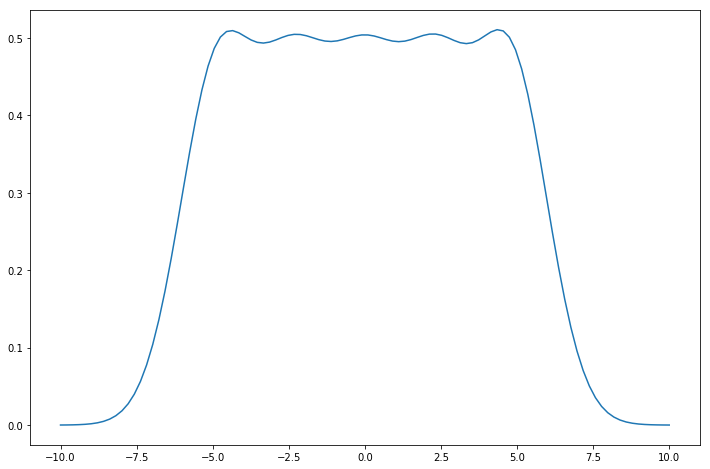

In [7]:
from mxfusion.inference import ModulePredictionAlgorithm, TransferInference
xt = np.linspace(-10, 10, 100)[:, None]

# More samples to give smoother plots
m.Y.factor.dgp_predict.n_samples = 500
infr_pred = TransferInference(ModulePredictionAlgorithm(model=m, observed=[m.X], target_variables=[m.Y]), 
                              infr_params=infr.params)

res = infr_pred.run(X=mx.nd.array(xt, dtype='float64'))[0]
f_mean, f_var = res[0].asnumpy()[0], res[1].asnumpy()[0]

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

mean = res[0].asnumpy()[:, 0]
plt.plot(xt, res[0].asnumpy().T)

std = np.sqrt(res[1].asnumpy())[:, 0]
plt.fill_between(xt[:, 0], mean - std, mean + std, alpha=0.1)
plt.scatter(X, Y.T)

In [ ]:
infr.params[m.Y.factor._extra_graphs[0].qU_mean_0] = mx.nd.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [ ]:
infr.params[m.Y.factor._extra_graphs[0].qU_mean_1] = mx.nd.array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]])

In [ ]:
infr.params[kernels[0].variance]

In [ ]:
infr.params[kernels[1].variance]

In [ ]:
plt.figure()
plt.plot(infr.params[m.Y.factor._extra_graphs[0].inducing_points_0])